In [2]:
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('GunViolenceDataset.csv')
df.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

In [20]:
!pip install wordcloud

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import random

from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

we can see from the description that not all the columns have complete data .

so our first step will be to figure out which columns will have how much null values and think accordingly how to deal with them.

In [4]:
df.shape[0]

239677

In [5]:
df.describe()#lots of null values everywhere

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

we can see from the description that not all the columns have complete data .

so our first step will be to figure out which columns will have how much null values and think accordingly how to deal with them.

In [6]:
per=[]
for i in df.columns:
    num=df[i].isnull().sum()
    final=(num/df.shape[0])*100
    per.append(final)

d={'Col': df.columns,'%null': per}
nulls=pd.DataFrame(data=d)
nulls

Col      %null
0                   incident_id   0.000000
1                          date   0.000000
2                         state   0.000000
3                city_or_county   0.000000
4                       address   6.883013
5                      n_killed   0.000000
6                     n_injured   0.000000
7                  incident_url   0.000000
8                    source_url   0.195263
9   incident_url_fields_missing   0.000000
10       congressional_district   4.983373
11                   gun_stolen  41.513370
12                     gun_type  41.493760
13     incident_characteristics   0.136016
14                     latitude   3.305699
15         location_description  82.439283
16                    longitude   3.305699
17              n_guns_involved  41.493760
18                        notes  33.802576
19              participant_age  38.509327
20        participant_age_group  17.573234
21           participant_gender  15.171251
22             participant_name  51.007397
23     participant_relationship  93.418643
24           participant_status  11.526346
25             participant_type  10.373544
26                      sources   0.254092
27         state_house_district  16.176771
28        state_senate_district  13.491073

we can see from the results the columns that do not have any null value.

so it is safe for the starting to look in those for so really cool insights.

1- States with most recorded incidences

we will first look in which states we have most amount of Gun violence cases registerd

C:\Users\Basappa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



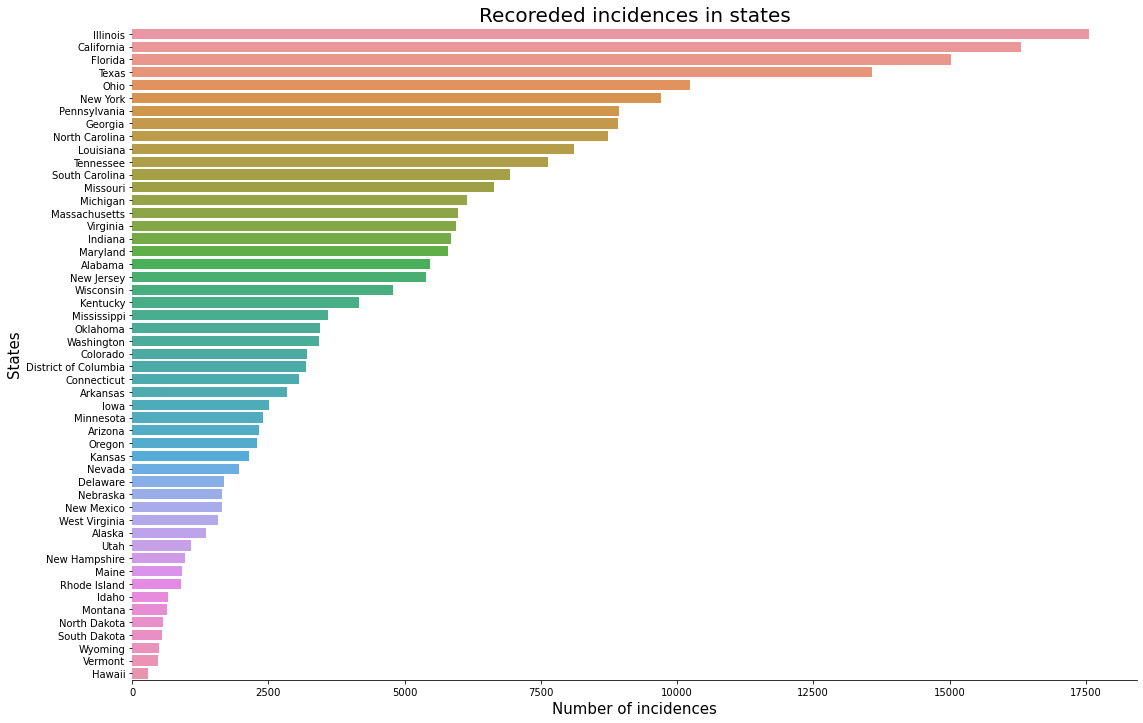

In [7]:
plt.figure(figsize=(18,12))
state=df['state'].value_counts()
sns.barplot(state.values,state.index)
plt.xlabel("Number of incidences",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Recoreded incidences in states",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

2- Cities with most recorded incidences

Now having a look at cities with most Gun Violence

C:\Users\Basappa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



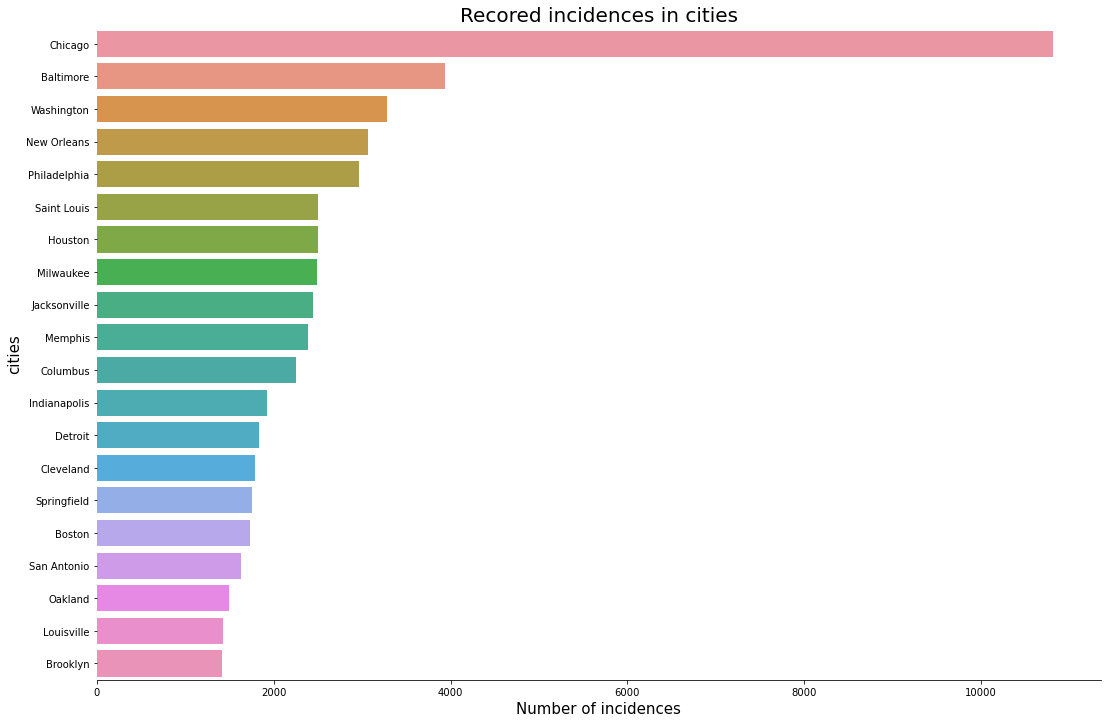

In [8]:
plt.figure(figsize=(18,12))
state=df['city_or_county'].value_counts()[:20]
sns.barplot(state.values,state.index)
plt.xlabel("Number of incidences",fontsize=15)
plt.ylabel("cities",fontsize=15)
plt.title("Recored incidences in cities",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

LOOKS LIKE CHICAGO IS FAR BEYOND OTHERS

3- Growth rate of Gun Violence

Now we are digging a little bit deeper to see how the gun Violence is affected in different states in course of 2013-2018,

In [9]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-05
4   2013-01-07
Name: date, dtype: datetime64[ns]

In [10]:
df['year']=df['date'].dt.year

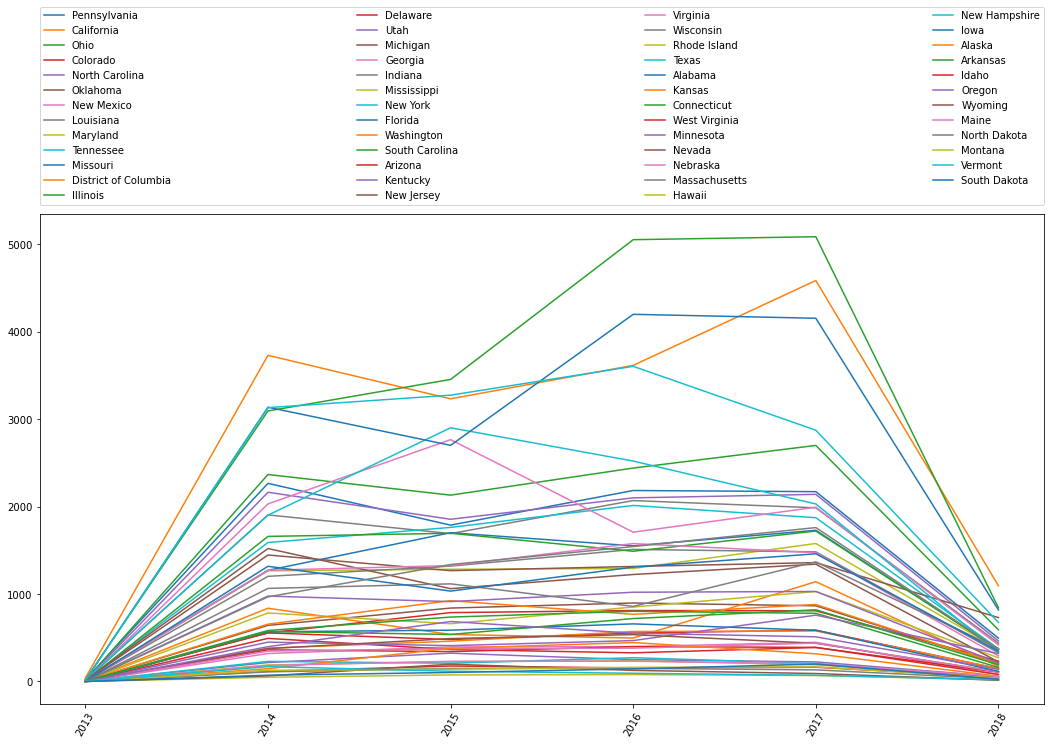

In [11]:
state_lst=[df['state'].unique()]
year_lst=[df['date'].dt.year.unique()]

state_lst_new=[]
for i in range(0,51):
    new=state_lst[0][i]
    state_lst_new.append(new)
    
year_lst_new=[]
for i in range(0,6):
    new=year_lst[0][i]
    year_lst_new.append(new)

plt.figure(figsize=(18,9))
for state in state_lst_new:
    yearly_incd=[]
    for year in year_lst_new:
        my= df.loc[df['state']==state]
        sum=my.loc[my['year']==year]
        sol=sum.shape[0]
        yearly_incd.append(sol)
    plt.plot(yearly_incd,label=state)
plt.xticks(np.arange(6),tuple(year_lst_new),rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.show()

The graph clearly shows that some states are definately using GUNS in their daily life far more than others.

4-People killed and injured over time

We are having a look at how many people are victims of these Gun violence or the course of time.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from plotly.validator_cache import ValidatorCache

In [23]:
years_killed=df.groupby(df['year']).sum()
x=years_killed['n_killed'].index.tolist()
y=years_killed['n_killed'].values.tolist()
z=years_killed['n_injured'].values.tolist()

#create style trace
trace0=go.Scatter(
x = x,
y = y,
name='no. of people killed',
  line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,dash='dot')
)
trace1=go.Scatter(
x = x,
y = z,
name='no. of people injured',
  line = dict(
        color = ('rgb(10, 205, 26)'),
        width = 4,dash='dot')
)
trace2=go.Scatter(
x = x,
y = [y+z for y,z in zip(y,z)],
name='Total no. of people effected',
  line = dict(
        color = ('rgb(20, 20, 205)'),
        width = 4,dash='dot')
)


data=[trace0,trace1,trace2]

#edit layout

layout=dict(title='people killed or injured every year',
           xaxis=dict(title='Years'),
           yaxis=dict(title='NO. of people killed or injured'))

fig = dict(data=data, layout=layout)
#fig.show()
py.iplot(fig , filename='styled-line')
#configure_plotly_browser_state()

We can definately see a trend over there .

obviously more peoples are injured tha killed.

5-People killed or injured in states

Now we are digging deep to see population effected by these GUN abuses in different states.

In [22]:
state_killed=df.groupby(df['state']).sum()
sk_x=state_killed['n_killed'].index.tolist()
sk_y=state_killed['n_killed'].values.tolist()
si=state_killed['n_injured'].values.tolist()

trace1=go.Scatter(
x=sk_x,
y=sk_y,
name='people killed')

trace2=go.Scatter(
x=sk_x,
y=si,
name='people injured',
yaxis='y2')
data=[trace1,trace2]

layout = go.Layout(
    title='Incidences in states',
    xaxis=dict(title='states'),
    yaxis=dict(
        title='People killed',
        titlefont=dict(
            color='rgb(140,38,78)')
    ),
    yaxis2=dict(
        title='people injured',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
 )
                 
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double.html')

6-Gun use in congressional district

In U.S.A. each states are divided into many congressional districts and it ranges from as few as 2 - (40s)

C:\Users\Basappa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



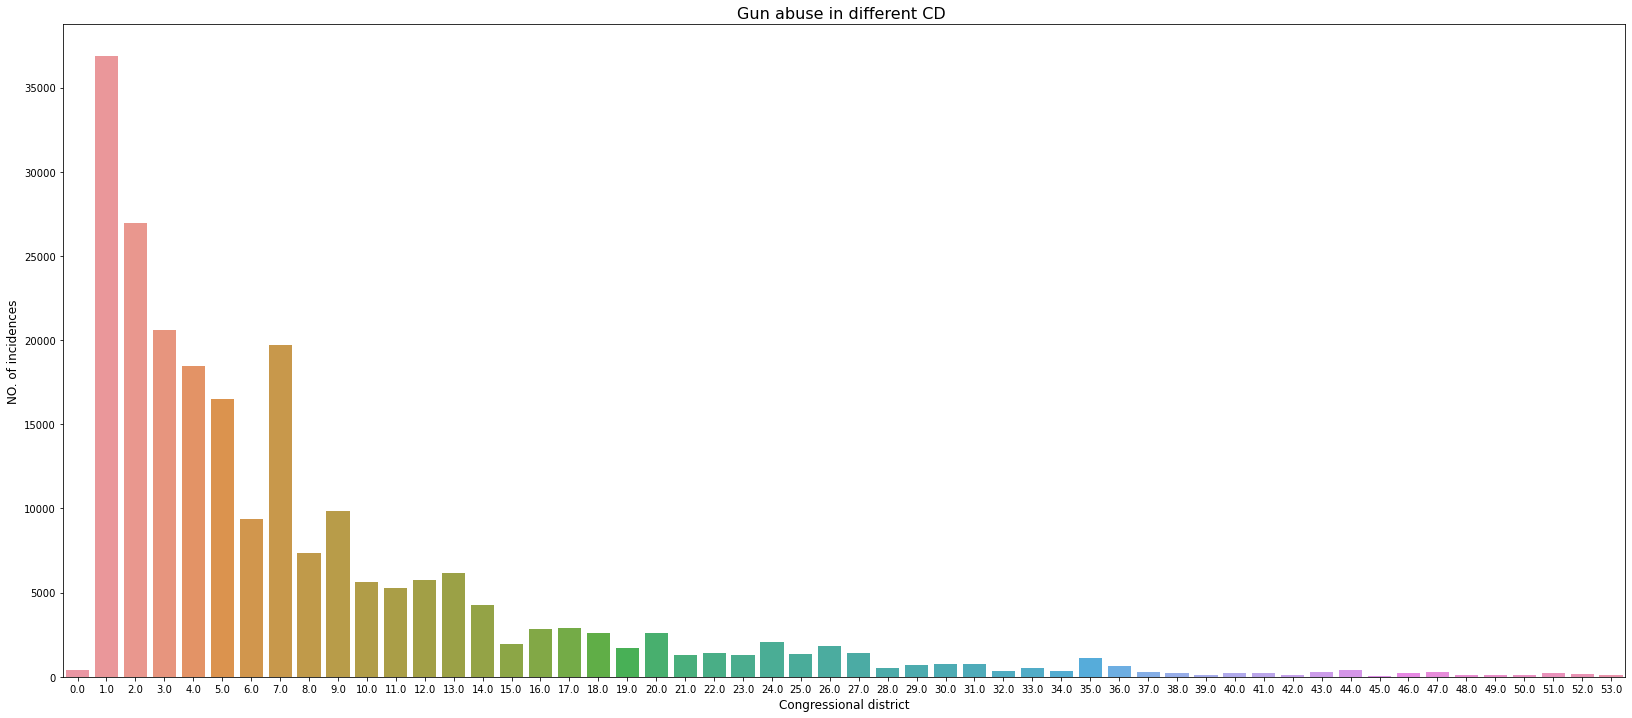

In [15]:
cd=df[np.isfinite(df['congressional_district'])]
my_cd=cd['congressional_district'].value_counts()

plt.figure(figsize=(28,12))
sns.barplot(my_cd.index,my_cd.values)
plt.xlabel("Congressional district",fontsize=12)
plt.ylabel("NO. of incidences",fontsize=12)
plt.title("Gun abuse in different CD ",fontsize=16)
plt.show()

7- Types of Guns used

In [16]:
type=df.dropna(how='any',axis=0)
my_type=type['gun_type'].values.tolist()
del( my_type[5:11])

my_set=set()
for guns in my_type:
    if len(guns)<=18:
        adds=guns.split("::")[1]
        my_set.add(adds)
    else:
        my_item=[]
        my_items=[]
        lst1=guns.split("||")
        for item in lst1:
            my=item.split("::")
            my_item.append(my)
        for items in my_item:
            adds=items[1]
            my_items.append(adds)
        for adding in my_items:
            my_set.add(adding)
        
        
remove=['45 Auto||1','9mm||1','Handgun||1','Rifle||1']
for rem in remove:
    my_set.remove(rem)
my_set

str_set=[]
for e in my_set:
    string=str(e)
    str_set.append(string)
str_set

['223 Rem [AR-15]',
 '410 gauge',
 '25 Auto',
 '9mm',
 '380 Auto',
 '32 Auto',
 '12 gauge',
 '44 Mag',
 '7.62 [AK-47]',
 '357 Mag',
 '22 LR',
 'Shotgun',
 '30-30 Win',
 '38 Spl',
 '45 Auto',
 '40 SW',
 'Other',
 'Unknown',
 'Handgun',
 'Rifle']

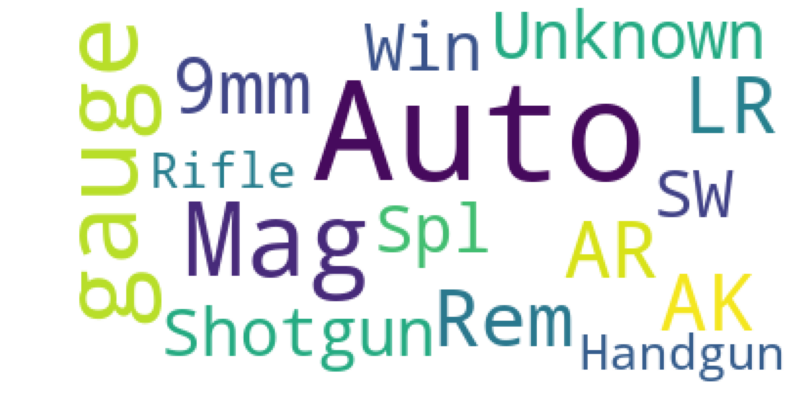

In [25]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                         ).generate(' '.join(str_set))
print(wordcloud)
fig = plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

8-Areas of maximum Gun related incidences

Now we are going to plot the same graph of Gun usage incidence in different states but now our motive is to see weather geographical condition has to do anything with these incidences.

In [19]:
item=df['state'].value_counts().index.tolist()
item_size=df['state'].value_counts().values.tolist()

cities = []
scale = 250


for i in range(len(item)):
    lim = item[i]
    df_sub = df.loc[df['state']==lim][:1]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = item[i] + '<br>Gun abuse ' + str(item_size[i]),
        marker = dict(
            size = item_size[i]/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim )
    cities.append(city)

layout = dict(
        title = 'Gun abuse around USA state',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
#fig.show(renderer="colab")
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )
plt.savefig('abc.png')

<Figure size 432x288 with 0 Axes>

It is so clear from the plot that the region on the EAST is having more incidences of gun usage than any other part.

In map we can point out ares where it is relatively very low(safe for living)

to be more sure about these facts we will see these distribution of gun use across USA in difference city or county.

In [28]:
item=df['city_or_county'].value_counts()[:1000].index.tolist()
item_size=df['city_or_county'].value_counts()[:5000].values.tolist()

cities = []



for i in range(len(item)):
    lim = item[i]
    df_sub = df.loc[df['city_or_county']==lim][:1]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['state'],
        marker = dict(
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim )
    cities.append(city)

layout = dict(
        title = 'Gun abbuse around USA',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations-b' )

We can clearly see the density of incidences in USA.

9-Distribution of age of people involved

In [29]:
df_s=df.dropna(subset=['participant_age'])

all_age=[]
guns_age=df_s['participant_age'].tolist()
for age in guns_age:
    if len(age)>5:
        x=age.split("||")
        for fin_age in x:
            y=fin_age.split("::")[0]
            all_age.append(y)
    else:
        k=age.split("::")[0]
        all_age.append(k)

In [30]:
len(all_age)

220441

In [31]:
count=0
mount=0
all_age_f=[]
for aa in all_age:
    if len(aa)>1:
        count = count+1
    else:
        mount = mount+1
        all_age_f.append(int(aa))

In [32]:
group_labels = ['distplot']
rand_data=random.sample(all_age_f,50000)
hist_data=[rand_data]

fig = ff.create_distplot(hist_data, group_labels)
py.iplot(fig, filename='Basic Distplot')

We can see a skewed normal distribution with maximum value at 0 so the age closer to the mean has more chances of incident_participation but as we move away from mean age in positive direcition probability of incident_participation decreases, skewed graph also shows very low(or no) probability for movement in negative direction.

10-Time series of incidences and effects

We are now looking into how many incidences recorded in duration of 2013-2018 and how they effected the people.

In [34]:
df['singles']=1

In [35]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [36]:
time_s=df.groupby(['date']).sum()

In [37]:
trace1 = go.Scatter(
                x=time_s.index,
                y=time_s['n_killed'],
                name = "People killed",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace2 = go.Scatter(
                x=time_s.index,
                y=time_s['n_injured'],
                name = "Injured",
                line = dict(color = '#3F3B3C'),
                opacity = 0.8)
trace3 = go.Scatter(
                x=time_s.index,
                y=time_s['singles'],
                name = "Incidences",
                line = dict(color = '#3A6A3A'),
                opacity = 0.8)
data = [trace1,trace2,trace3]

layout = dict(
    title = "Over time stats",
    xaxis = dict(
        range = ['2013-01-01','2018-04-01'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Manually Set Range")
plt.savefig('xyz.png')  

<Figure size 432x288 with 0 Axes>